<a href="https://colab.research.google.com/github/Nikhaikal/Nikhaikal/blob/main/ShapeDetection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ball_edit.jpg to ball_edit.jpg
Image shape: (800, 1200, 3)
Number of circles detected: 4


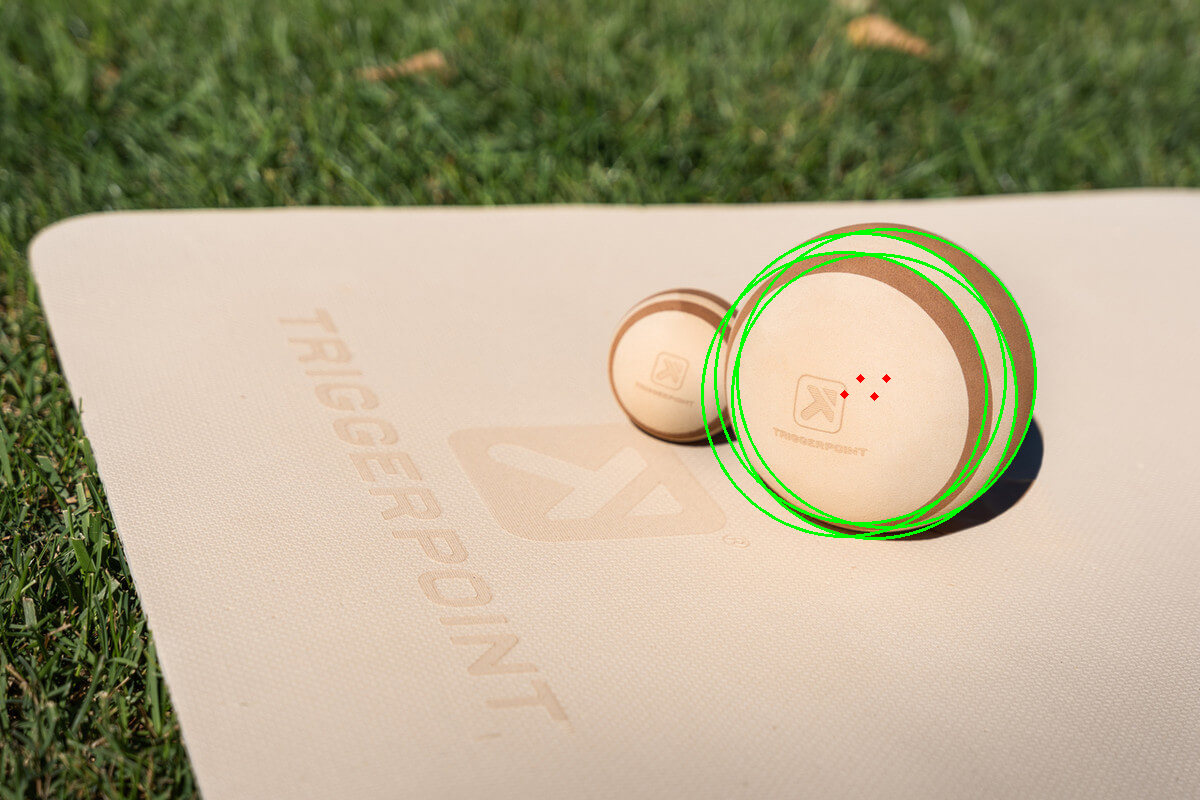

In [1]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

uploaded = files.upload()

img = cv2.imread("ball_edit.jpg")

if img is None:
    print("Image not found. Please make sure 'ball_edit.jpg' is uploaded.")
else:
    height, width, c = img.shape
    print("Image shape:", img.shape)


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)

    circles = cv2.HoughCircles(
        gray,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,
        param2=30,
        minRadius=135,
        maxRadius=150
    )


    if circles is not None:
        circles = np.uint16(np.around(circles))

        for co, i in enumerate(circles[0, :], start=1):
            center = (i[0], i[1])
            radius = i[2]
            cv2.circle(img, center, radius, (0, 255, 0), 2)
            cv2.circle(img, center, 2, (0, 0, 255), 3)

        print("Number of circles detected:", co)

        cv2_imshow(img)
    else:
        print("No circles detected.")
